In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

In [3]:
x_data=np.linspace(0.0,10.0,1000000)

In [4]:
noise=np.random.randn(len(x_data))

In [5]:
x_data

array([  0.00000000e+00,   1.00000100e-05,   2.00000200e-05, ...,
         9.99998000e+00,   9.99999000e+00,   1.00000000e+01])

In [6]:
y_true=(0.5 * x_data) + 5 + noise

In [7]:
x_df=pd.DataFrame(data=x_data,columns=['X Data'])

In [8]:
y_df=pd.DataFrame(data=y_true,columns=['Y'])

In [9]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [10]:
my_data=pd.concat([x_df,y_df],axis=1)

In [11]:
my_data.head()

,X Data,Y
0,0.00000,5.975203
1,0.00001,5.051408
2,0.00002,3.624437
3,0.00003,6.042067
4,0.00004,5.219454


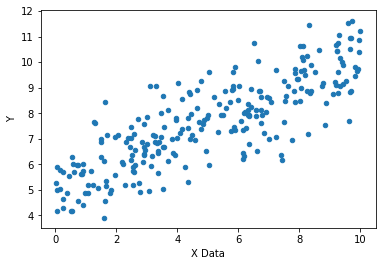

In [12]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

In [13]:
batch_size=8

In [14]:
m=tf.Variable(0.81)
b=tf.Variable(0.17)

In [15]:
xph=tf.placeholder(tf.float32,[batch_size])

In [16]:
yph=tf.placeholder(tf.float32,[batch_size])

In [17]:
y_model=m * xph + b

In [18]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [19]:
optimizr=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizr.minimize(error)

In [20]:
init=tf.global_variables_initializer()

In [21]:
with tf.Session() as sess:
    sess.run(init)
    
    batches=1000
    
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data),size=batch_size)
        feed={xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m, model_b=sess.run([m,b])

In [22]:
model_m

0.47202229

In [23]:
model_b

4.8970232

In [24]:
y_hat=x_data * model_m + model_b

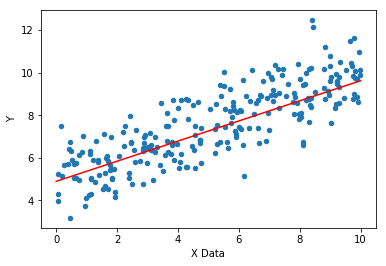

In [25]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

In [26]:
#TF Estimator 

In [27]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

In [28]:
estimator=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_tf_random_seed': 1, '_session_config': None, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_log_step_count_steps': 100, '_save_checkpoints_steps': None, '_model_dir': 'C:\\Users\\Satish\\AppData\\Local\\Temp\\tmp7l93y4g2', '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000}


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [31]:
print(x_train.shape)

(700000,)


In [32]:
print(x_eval.shape)

(300000,)


In [33]:
input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [34]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [35]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

In [37]:
#estimator.train(input_fn=input_func,steps=1000)

In [39]:
#train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

In [40]:
#eval_metrics=estimator.evaluate(input_fn=eval_input_func,steps=1000)

In [42]:
#print('Training Data Metrics')
#print(train_metrics)

In [44]:
print('Eval Metrics')
#print(eval_metrics)

Eval Metrics


In [45]:
brand_new_data=np.linspace(0,10,10)

In [46]:
input_fn_predict=tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [49]:
#list(estimator.predict(input_fn=input_fn_predict))

In [52]:
#predictions=[]

#for pred in estimator.predict(input_fn=input_fn_predict):
#    predictions.append(pred['predictions'])

In [54]:
#predictions

In [ ]:
mydata.smaple(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')